In [75]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

useful_features = ['OverallQual', 'GarageCars', 'BsmtQual_Ex', 'RoofMatl_CompShg',
       'KitchenQual_Ex', 'KitchenAbvGr', 'GarageFinish_Unf', 'CentralAir_N',
       'GrLivArea', 'Functional_Sev', 'Exterior2nd_CmentBd', 'PoolArea',
       'LandSlope_Gtl', 'LandContour_Bnk', 'GarageType_CarPort',
       'Exterior1st_Stucco', 'Neighborhood_Crawfor', 'Heating_Grav',
       'HouseStyle_2.5Unf', 'BsmtFinSF1', 'Functional_Typ',
       'GarageType_Detchd', 'KitchenQual_Gd', 'TotalBsmtSF', 'Fireplaces',
       'MSZoning_RM', 'KitchenQual_TA', '2ndFlrSF', '1stFlrSF',
       'LandContour_Low']

remove_features = [
       'LowQualFinSF', 'FullBath', 'LandSlope_Sev', 'BldgType_1Fam',
       'RoofStyle_Gable', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv',
       'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'MasVnrType_BrkFace', 'ExterQual_Ex',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Mn', 'BsmtFinType1_LwQ', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'HeatingQC_Ex', 'Electrical_FuseA', 'FireplaceQu_Ex',
       'GarageType_BuiltIn', 'GarageQual_TA', 'GarageCond_TA',
       'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_Alloca'
]
# remove_features[:20]
print(train)
print(test)

train.head()
test.head()

missing_percentages = train.isnull().sum() / len(train)
print(list(missing_percentages))
train = train.drop(train.columns[train.isnull().mean() > 0.99], axis=1)
test = test.drop(test.columns[test.isnull().mean() > 0.99], axis=1)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [76]:
from sklearn.preprocessing import StandardScaler

missing_cols = train.columns[train.isnull().any()].tolist()

train[missing_cols] = train[missing_cols].fillna(train[missing_cols].mode().iloc[0])
test[missing_cols] = test[missing_cols].fillna(test[missing_cols].mode().iloc[0])
categorical_train = train.select_dtypes(include=['object'])
categorical_test = test.select_dtypes(include=['object'])
categorical_cols = categorical_train.columns
y = train['SalePrice']
X = train.drop(['SalePrice','Id'],axis=1)
X_prediction = test.drop(['Id'],axis=1)
print(useful_features)
print(sum(categorical_train.nunique()))
print(X.shape)
print(X_prediction.shape)

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X[X.select_dtypes(exclude=['object']).columns])
X_test_scaled = scaler.fit_transform(X_prediction[X_prediction.select_dtypes(exclude=['object']).columns])

X = pd.get_dummies(X, columns=categorical_cols)
X_prediction = pd.get_dummies(X_prediction, columns=categorical_cols)
#X = X[useful_features]
X = X.drop(remove_features,axis=1)
X_prediction = X_prediction.drop(remove_features,axis=1)
X = X[X_prediction.columns]
print(X.shape)
print(X_prediction.shape)

['OverallQual', 'GarageCars', 'BsmtQual_Ex', 'RoofMatl_CompShg', 'KitchenQual_Ex', 'KitchenAbvGr', 'GarageFinish_Unf', 'CentralAir_N', 'GrLivArea', 'Functional_Sev', 'Exterior2nd_CmentBd', 'PoolArea', 'LandSlope_Gtl', 'LandContour_Bnk', 'GarageType_CarPort', 'Exterior1st_Stucco', 'Neighborhood_Crawfor', 'Heating_Grav', 'HouseStyle_2.5Unf', 'BsmtFinSF1', 'Functional_Typ', 'GarageType_Detchd', 'KitchenQual_Gd', 'TotalBsmtSF', 'Fireplaces', 'MSZoning_RM', 'KitchenQual_TA', '2ndFlrSF', '1stFlrSF', 'LandContour_Low']
248
(1460, 78)
(1459, 78)
(1460, 233)
(1459, 233)


In [81]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Import the necessary libraries for data manipulation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Assume 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print(X_train.shape)
# Define a custom evaluation metric for RMSE of logarithmic values
def log_rmse(preds, dtrain):
    labels = dtrain.get_label()
    log_preds = np.log(preds)
    log_labels = np.log(labels)
    return 'log_rmse', np.sqrt(np.mean((log_preds - log_labels) ** 2))




# Define the hyperparameter grid
# param_grid = {
#     'max_depth': [5, 10, 15],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [500, 1000, 2000],
#     'gamma': [0, 0.1, 0.5],
#     'subsample': [0.5, 0.8, 1],
#     'colsample_bytree': [0.5, 0.8, 1],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0, 0.1, 0.5]
# }

param_grid = {'n_estimators': [2000], 'learning_rate': [0.1]}
# Define the XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))



(1168, 233)


KeyboardInterrupt: 

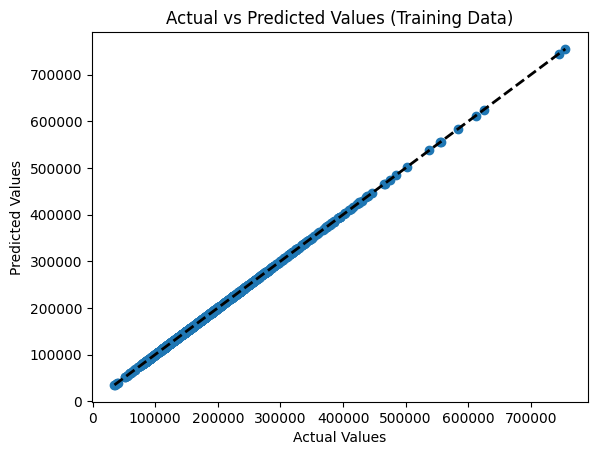

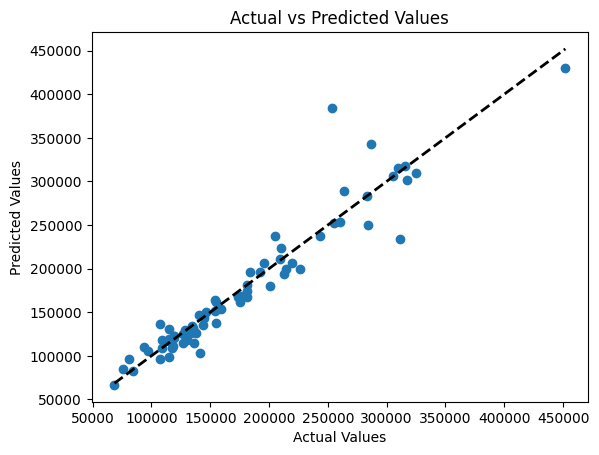

[]


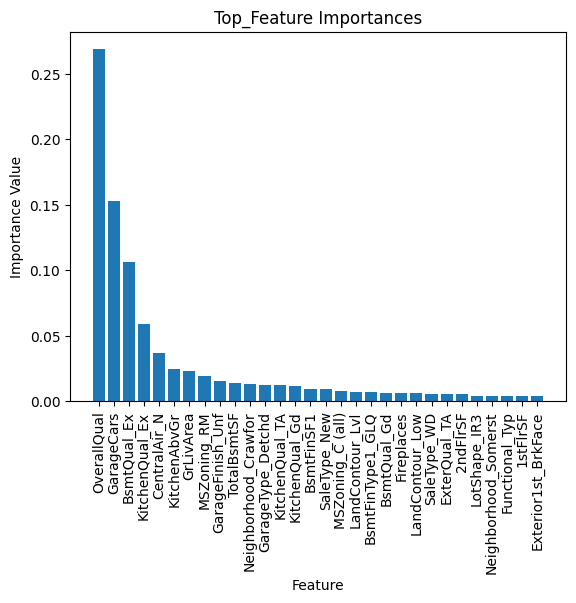

[Index(['OverallQual', 'GarageCars', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'CentralAir_N', 'KitchenAbvGr', 'GrLivArea', 'MSZoning_RM',
       'GarageFinish_Unf', 'TotalBsmtSF', 'Neighborhood_Crawfor',
       'GarageType_Detchd', 'KitchenQual_TA', 'KitchenQual_Gd', 'BsmtFinSF1',
       'SaleType_New', 'MSZoning_C (all)', 'LandContour_Lvl',
       'BsmtFinType1_GLQ', 'BsmtQual_Gd', 'Fireplaces', 'LandContour_Low',
       'SaleType_WD', 'ExterQual_TA', '2ndFlrSF', 'LotShape_IR3',
       'Neighborhood_Somerst', 'Functional_Typ', '1stFlrSF',
       'Exterior1st_BrkFace'],
      dtype='object')]
[[ 7  9  8  3  4 11 10  1  2  6 12  5  0]]
Index(['LotConfig_Inside', 'Neighborhood_IDOTRR', 'Condition2_Norm',
       'HouseStyle_SFoyer', 'RoofStyle_Gambrel', 'BsmtFinType1_BLQ',
       'Electrical_FuseF', 'Electrical_FuseP', 'GarageType_Basment',
       'GarageQual_Po', 'Fence_GdWo', 'Fence_MnWw', 'SaleType_COD'],
      dtype='object')


In [78]:
from sklearn.inspection import permutation_importance

# Plot the predictions with the training data
plt.scatter(y_train, y_pred_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Data)')
plt.show()

# Plot the predictions
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


# Get the feature importances
feature_importances = best_model.feature_importances_
print(feature_importances[feature_importances<0])
# Get the top 20 most important features
top_features = feature_importances.argsort()[-30:][::-1]

# Get the feature names
feature_names = X.columns[top_features]

# Plot a bar chart
plt.bar(feature_names, feature_importances[top_features])
plt.xlabel('Feature')
plt.ylabel('Importance Value')
plt.title('Top_Feature Importances')
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.show()
print(f'[{feature_names}]')

# Permutation importance
results = permutation_importance(best_model, X, y, n_repeats=10, random_state=42)
permutation_importances = results.importances_mean
negative_features = permutation_importances[permutation_importances < 0].argsort()[::-1]
print(f'[{negative_features}]')
# Get the feature names
negative_feature_names = X.columns[np.where(permutation_importances < 0)[0]]
negative_feature_names
print(negative_feature_names)


In [79]:
# Scale the test data using the same scaler as the training data
print(len(X_prediction.columns))
print(len(X.columns))

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_prediction)

# Save the predictions to a submission.csv file
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})
submission.to_csv('submission_1.csv', index=False)

233
233
